In [0]:
!unzip "facial-keypoints-detection.zip"

Archive:  facial-keypoints-detection.zip
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense,BatchNormalization
from keras import callbacks

directory='training.csv'

df=pd.read_csv(directory)

Using TensorFlow backend.


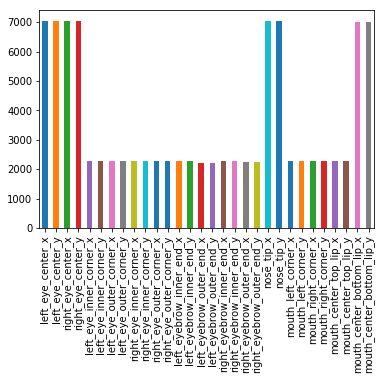

In [0]:
df.describe().loc['count'].plot.bar()

In [0]:
fully_annotated=df.dropna()
fully_annotated.shape

(2140, 31)

In [0]:
def extract_images(df):
  return np.stack([np.fromstring(string,dtype=float,sep=' ').reshape((96,96)) for string in df['Image']]).astype(np.float)[:, :, :, np.newaxis]
data=extract_images(fully_annotated)
labels= np.vstack(fully_annotated[fully_annotated.columns[:-1]].values)

In [0]:
data.shape,labels.shape

((2140, 96, 96, 1), (2140, 30))

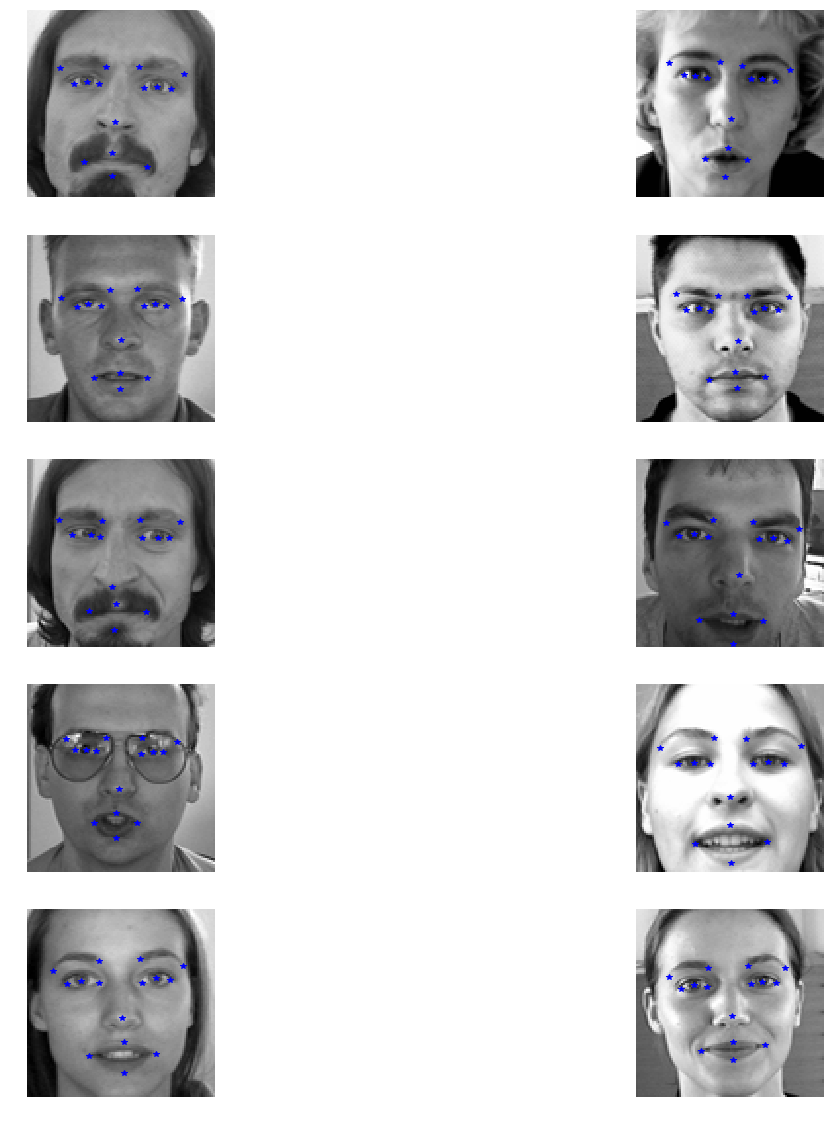

In [0]:
fig,axes=plt.subplots(figsize=(20,20),nrows=5,ncols=2)
images=data[0:10]
points=labels[0:10]
for point,image,ax in zip(points,images,axes.ravel()):
  ax.imshow(image.reshape((96,96)), cmap='gray')
  ax.plot(point.reshape((15,2))[:,0],point.reshape((15,2))[:,1],'b*')
  ax.axis('off')

In [0]:
X=data/255
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

pipeline=make_pipeline(
    
          MinMaxScaler(feature_range=(-1,1))
)
Y=pipeline.fit_transform(labels)


In [0]:
model=Sequential()
model.add(Conv2D(16,(3,3),padding='same',input_shape=(96,96,1),activation='relu'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30,activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 96, 96, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [0]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
model.fit(X,Y,batch_size=64,epochs=100,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 5s 3ms/step - loss: 0.0611 - acc: 0.1174 - val_loss: 0.0816 - val_acc: 0.0234
Epoch 2/100
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0556 - acc: 0.1933 - val_loss: 0.0811 - val_acc: 0.0537
Epoch 3/100
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0537 - acc: 0.2284 - val_loss: 0.0838 - val_acc: 0.0327
Epoch 4/100
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0524 - acc: 0.2775 - val_loss: 0.0840 - val_acc: 0.0374
Epoch 5/100
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0519 - acc: 0.2833 - val_loss: 0.0826 - val_acc: 0.0304
Epoch 6/100
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0514 - acc: 0.3160 - val_loss: 0.0855 - val_acc: 0.0327
Epoch 7/100
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0509 - acc: 0.30

In [0]:
!unzip test.zip
df_test=pd.read_csv("test.csv")

df.head()

Archive:  test.zip
  inflating: test.csv                


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [0]:
data_test=extract_images(df_test)

In [0]:
out=model.predict(data_test[0:10].reshape((10,96,96,1))/255)


In [0]:
out=pipeline.inverse_transform(out).reshape((10,15,2))

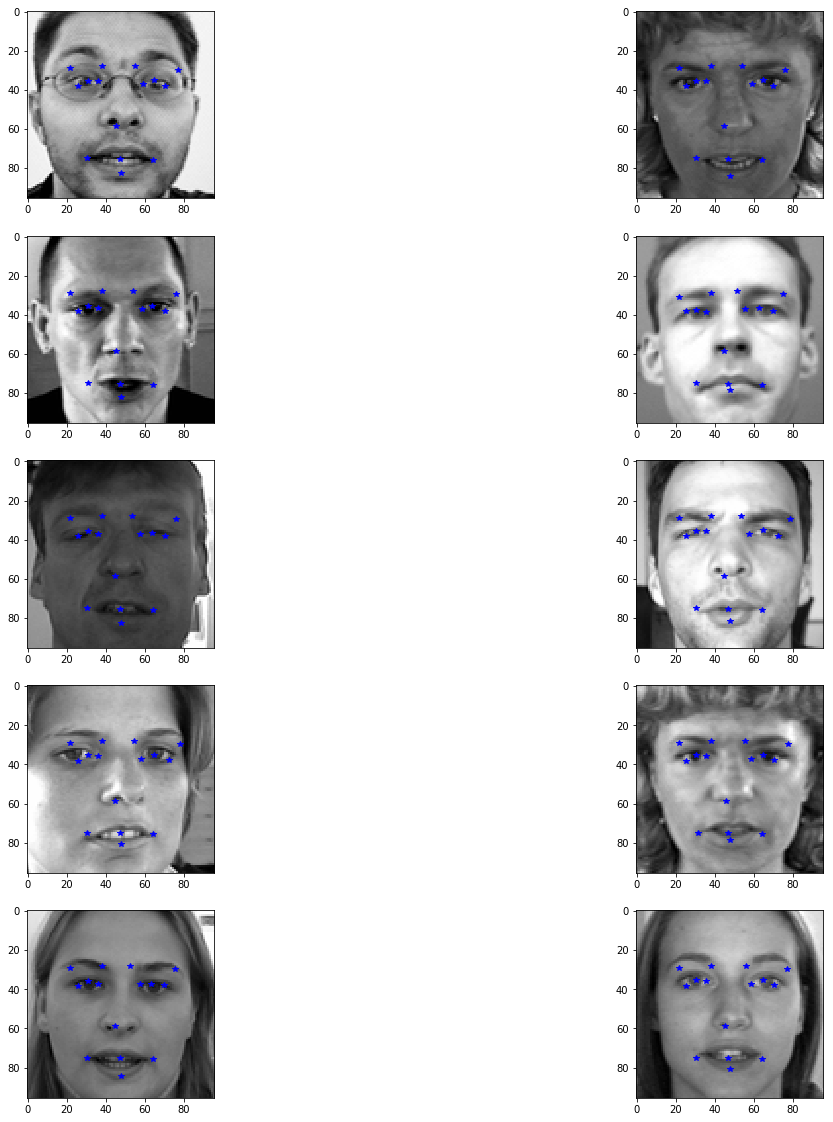

In [0]:
fig,axes=plt.subplots(figsize=(20,20),nrows=5,ncols=2)
images=data_test[0:10]
for point,image,ax in zip(out,images,axes.ravel()):
  ax.imshow(image.reshape((96,96)), cmap='gray')
  ax.plot(point[:,0],point[:,1],'b*')

In [0]:
model.save("FKD.h5")

In [0]:
import keras
model_new=keras.models.load_model("FKD.h5")

AttributeError: ignored